<a href="https://colab.research.google.com/github/Alenushka2013/Practice_stepic/blob/main/213585_4_4_ExcelPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
df = pd.read_excel('/content/4.4.1.xlsx', sheet_name=None)

In [48]:
sheets_dict = pd.read_excel("/content/4.4.1.xlsx", sheet_name=None)

for sheet_name, df in sheets_dict.items():
    print(f"Лист: {sheet_name}")
    print(df.head())  # Выведем первые строки каждого листа

Лист: Торговля
   ID\nоперации       Дата Магазин  Артикул  Операция  \
0             1 2021-06-01     М01        1  Поставка   
1             2 2021-06-01     М01        2  Поставка   
2             3 2021-06-01     М01        4   Продажа   
3             4 2021-06-01     М01        5  Поставка   
4             5 2021-06-01     М01        6   Продажа   

   Количество\nупаковок, шт  Цена руб/шт  
0                        20          187  
1                        40           89  
2                        21           19  
3                        50           39  
4                        26          270  
Лист: Товар
   Артикул    Отдел       Наименование товара Ед изм  Количество\nв упаковке  \
0        1   Молоко  Сливки 35% для взбивания   литр                     0.5   
1        2   Молоко       Молоко безлактозное   литр                     0.5   
2        3   Молоко                Кефир 3,2%   литр                     1.0   
3        4  Бакалея    Соль каменная помол №1     кг

In [49]:
sheets_dict.keys()

dict_keys(['Торговля', 'Товар', 'Магазин'])

In [50]:
df_trade = sheets_dict['Торговля']

In [51]:
df_trade.head()

,ID\nоперации,Дата,Магазин,Артикул,Операция,"Количество\nупаковок, шт",Цена руб/шт
0,1,2021-06-01,М01,1,Поставка,20,187
1,2,2021-06-01,М01,2,Поставка,40,89
2,3,2021-06-01,М01,4,Продажа,21,19
3,4,2021-06-01,М01,5,Поставка,50,39
4,5,2021-06-01,М01,6,Продажа,26,270


In [52]:
df_goods = sheets_dict['Товар']

In [53]:
df_goods.head()

,Артикул,Отдел,Наименование товара,Ед изм,Количество\nв упаковке,Поставщик
0,1,Молоко,Сливки 35% для взбивания,литр,0.5,Молокозавод №1
1,2,Молоко,Молоко безлактозное,литр,0.5,Экопродукты
2,3,Молоко,"Кефир 3,2%",литр,1.0,Молокозавод №2
3,4,Бакалея,Соль каменная помол №1,кг,1.0,Продбаза
4,5,Бакалея,Сахар песок белый,кг,1.0,"""Чай-кофе-сахар"""


In [54]:
df_store = sheets_dict['Магазин']
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID магазина  99 non-null     object
 1   Район        99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [55]:
df_store.head()

,ID магазина,Район
0,М01,Заречный
1,М02,Заречный
2,М03,Заречный
3,М04,Октябрьский
4,М05,Октябрьский


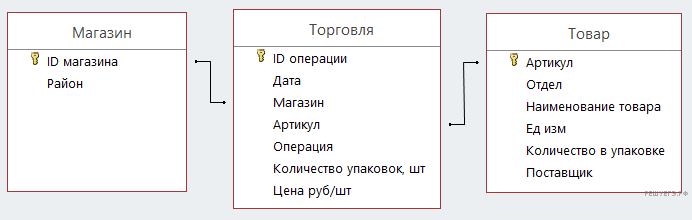

In [56]:
# Используя информацию из приведённой базы данных, определите общую прибыль,
# полученную за месяц магазинами Центрального района от торговли всеми видами круп.
df_merged = df_store.merge(df_trade, left_on="ID магазина", right_on="Магазин", how="outer").merge(df_goods, on = 'Артикул', how="outer")

In [57]:
df_merged.head()

,ID магазина,Район,ID\nоперации,Дата,Магазин,Артикул,Операция,"Количество\nупаковок, шт",Цена руб/шт,Отдел,Наименование товара,Ед изм,Количество\nв упаковке,Поставщик
0,М01,Заречный,1,2021-06-01,М01,1,Поставка,20,187,Молоко,Сливки 35% для взбивания,литр,0.5,Молокозавод №1
1,М01,Заречный,2934,2021-06-02,М01,1,Поставка,20,205,Молоко,Сливки 35% для взбивания,литр,0.5,Молокозавод №1
2,М01,Заречный,20625,2021-06-08,М01,1,Поставка,20,264,Молоко,Сливки 35% для взбивания,литр,0.5,Молокозавод №1
3,М01,Заречный,29476,2021-06-11,М01,1,Продажа,19,249,Молоко,Сливки 35% для взбивания,литр,0.5,Молокозавод №1
4,М01,Заречный,41151,2021-06-15,М01,1,Продажа,16,308,Молоко,Сливки 35% для взбивания,литр,0.5,Молокозавод №1


In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88037 entries, 0 to 88036
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID магазина              88037 non-null  object        
 1   Район                    88037 non-null  object        
 2   ID
операции              88037 non-null  int64         
 3   Дата                     88037 non-null  datetime64[ns]
 4   Магазин                  88037 non-null  object        
 5   Артикул                  88037 non-null  int64         
 6   Операция                 88037 non-null  object        
 7   Количество
упаковок, шт  88037 non-null  int64         
 8   Цена руб/шт              88037 non-null  int64         
 9   Отдел                    88037 non-null  object        
 10  Наименование товара      88037 non-null  object        
 11  Ед изм                   88037 non-null  object        
 12  Количество
в упаковке    88037 n

In [59]:
# Используя информацию из приведённой базы данных, определите общую прибыль,
# полученную за месяц магазинами Центрального района от торговли всеми видами круп.
#df1 = df_merged[(df_merged['Район'] == 'Центральный') & (df_merged["Наименование товара"].str.contains("Крупа", case=False, na=False)) & (df_merged['Операция'] == 'Продажа')]


In [60]:
df_merged['Наименование товара'].unique()

array(['Сливки 35% для взбивания', 'Молоко безлактозное', 'Кефир 3,2%',
       'Соль каменная помол №1', 'Сахар песок белый',
       'Колбаса краковская', 'Соль поваренная Экстра',
       'Хлопья овсяные Геркулес', 'Молоко овсяное',
       'Колбаса вареная любительская', 'Ветчина в оболочке',
       'Сосиски куриные', 'Макароны перья', 'Сосиски молочные',
       'Горох желтый колотый', 'Грудинка копченая', 'Чай зеленый ',
       'Молоко ультрапастеризованное', 'Кофе молотый',
       'Масло сливочное крестьянское', 'Сардельки', 'Фунчоза',
       'Бекон сырокопченый', 'Чай черный индийский', 'Бурый рис',
       'Яйцо диетическое', 'Колбаса ливерная ', 'Сливки 10%',
       'Молоко детское с 8 месяцев', 'Молоко кокосовое',
       'Мука хлебопекарная в\\с', 'Сметана 15%', 'Ряженка термостатная',
       'Крупа гречневая ядрица', 'Макароны вермишель',
       'Сервелат варенокопченый', 'Хлопья 4 злака', 'Сметана 25%',
       'Колбаса сырокопченая салями', 'Сосиски венские',
       'Рис круглоз

In [61]:
df_merged['Операция'].unique()

array(['Поставка', 'Продажа'], dtype=object)

In [62]:
df_merged['Total_result'] = df_merged['Количество\nупаковок, шт'] * df_merged['Цена руб/шт']

In [63]:
df1 = df_merged[(df_merged['Район'] == 'Центральный') & (df_merged["Наименование товара"].str.contains("Крупа", case=False, na=False))]


In [65]:
df1.loc[df1['Операция'] == 'Продажа', 'Total_result'].sum() - \
df1.loc[df1['Операция'] == 'Поставка', 'Total_result'].sum()

855586